## Data Gathering

Import libraries

In [1]:
import opendatasets as od
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

Download datasets

In [2]:
od.download("https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset


100%|██████████| 175M/175M [01:50<00:00, 1.66MB/s] 


In [4]:
# Move the downloaded dataset to datasets folder
os.makedirs("datasets")
os.rename("hair-type-dataset", "datasets/hair-type-dataset")

## Data Visualization and Exploration

In [5]:
dataset_path = 'datasets/hair-type-dataset/data'

In [6]:
subfolders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]
print("Subfolders (hair types):", subfolders)

Subfolders (hair types): ['curly', 'kinky', 'dreadlocks', 'Wavy', 'Straight']


In [7]:
# Count the number of images in each subfolder
image_counts = {}

for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    num_images = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    image_counts[subfolder] = num_images

In [8]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(list(image_counts.items()), columns=['Hair Type', 'Image Count'])
df

,Hair Type,Image Count
0,curly,514
1,kinky,217
2,dreadlocks,443
3,Wavy,330
4,Straight,488


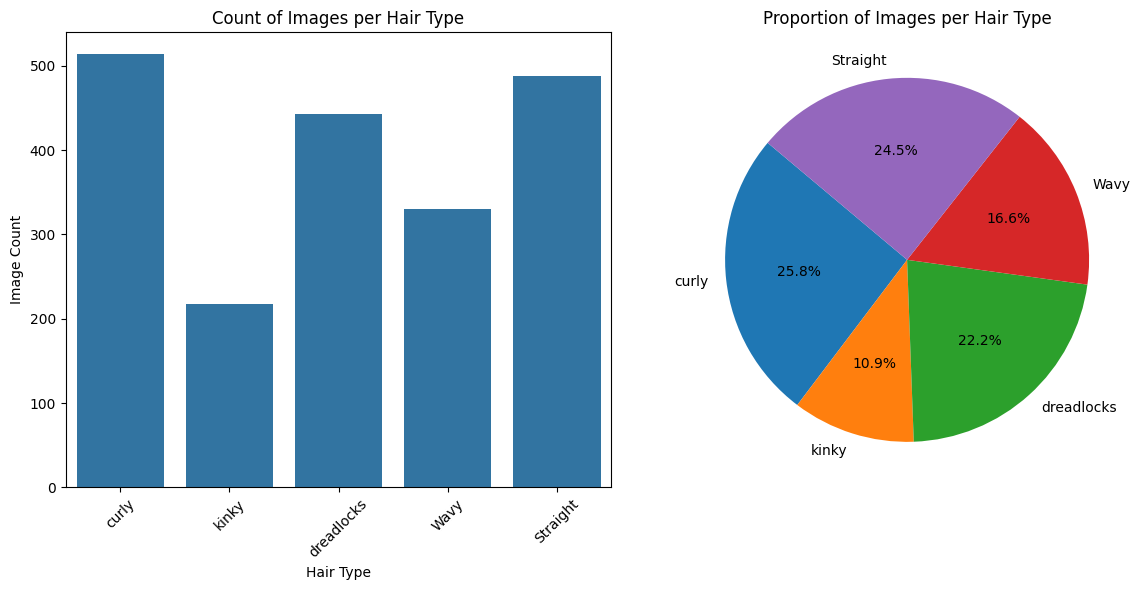

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Hair Type', y='Image Count', data=df)
plt.title('Count of Images per Hair Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(df['Image Count'], labels=df['Hair Type'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Images per Hair Type')

plt.tight_layout()
plt.show()

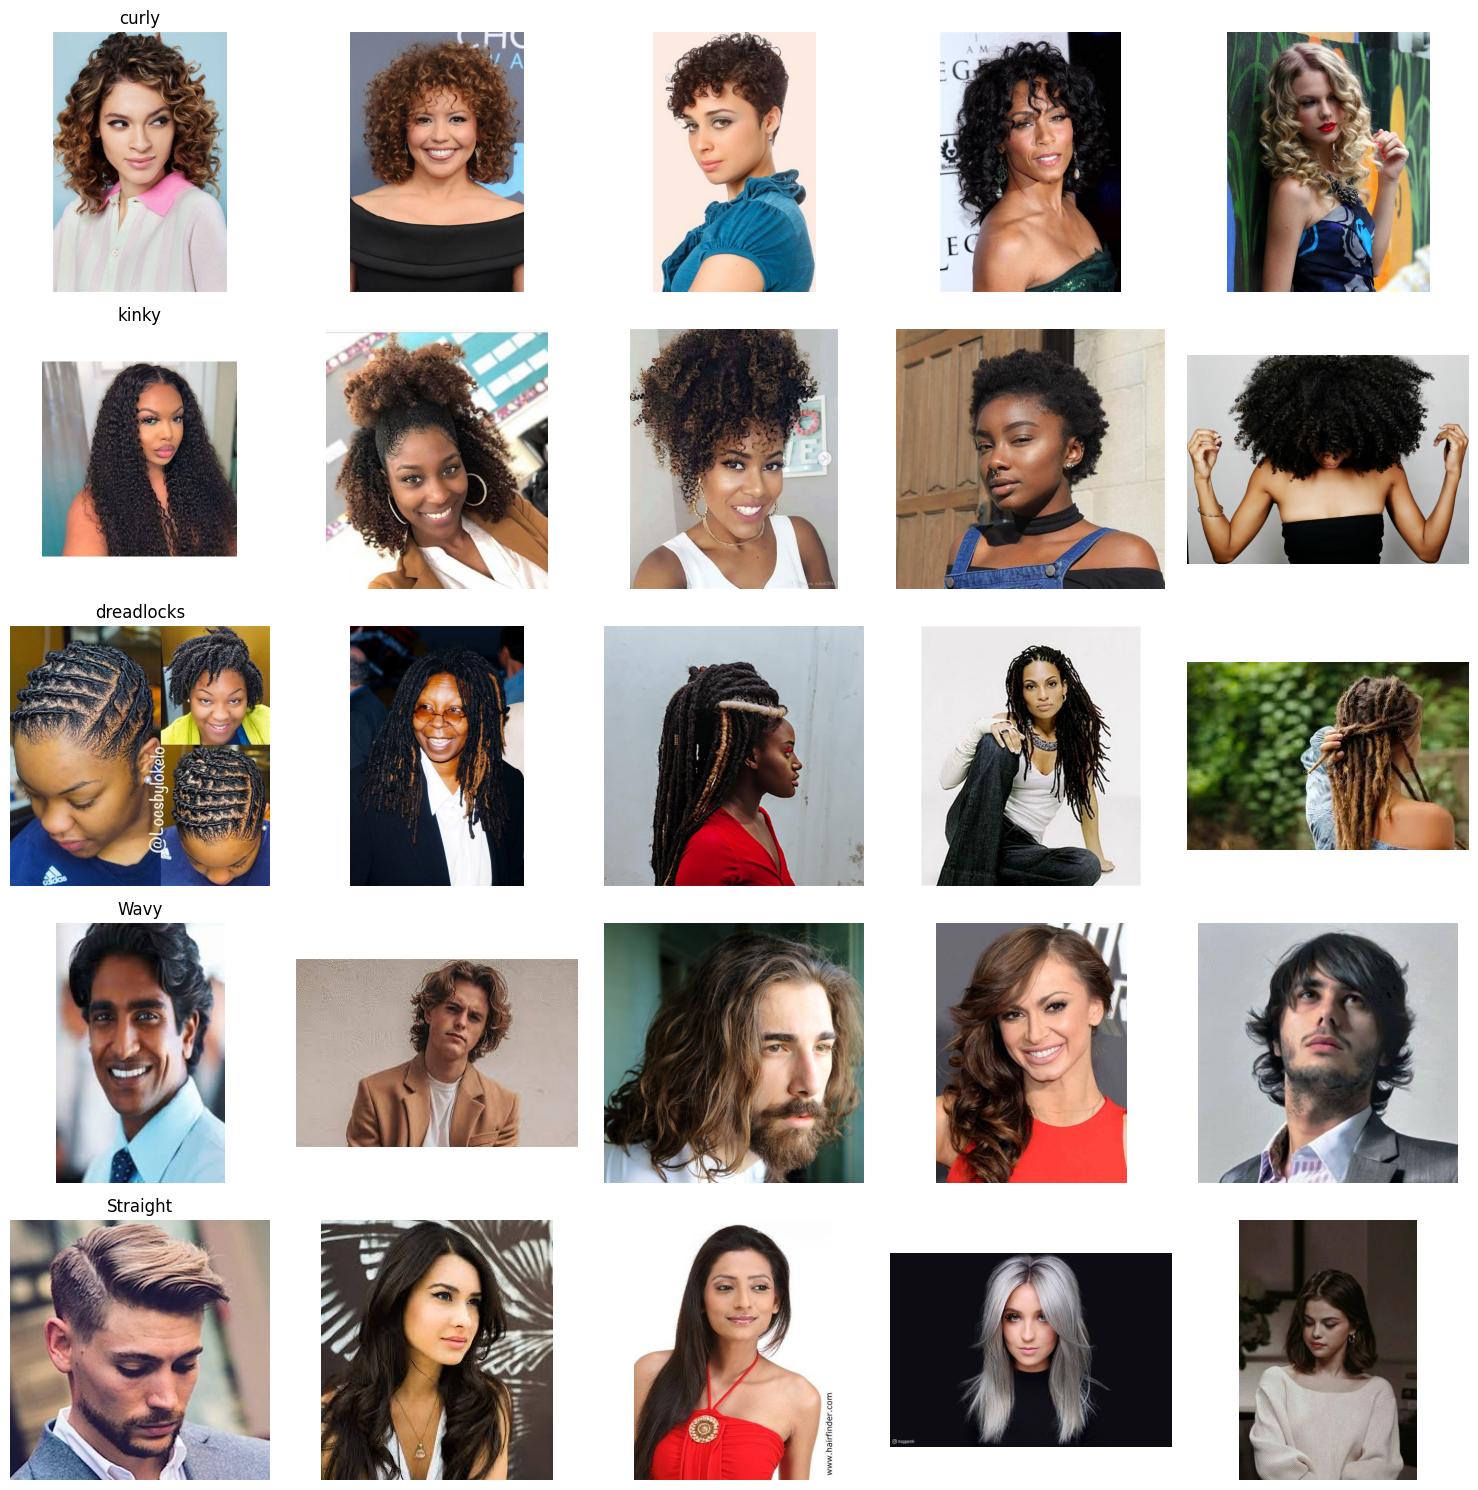

In [10]:
def display_images_from_folders(dataset_path, subfolders, num_images=5):
    fig, axs = plt.subplots(len(subfolders), num_images, figsize=(15, 3 * len(subfolders)))
    
    for i, subfolder in enumerate(subfolders):
        folder_path = os.path.join(dataset_path, subfolder)
        images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        
        for j in range(min(num_images, len(images))):
            img_path = os.path.join(folder_path, images[j])
            img = Image.open(img_path)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(subfolder, fontsize=12)
    
    plt.tight_layout()
    plt.show()

display_images_from_folders(dataset_path, subfolders, num_images=5)